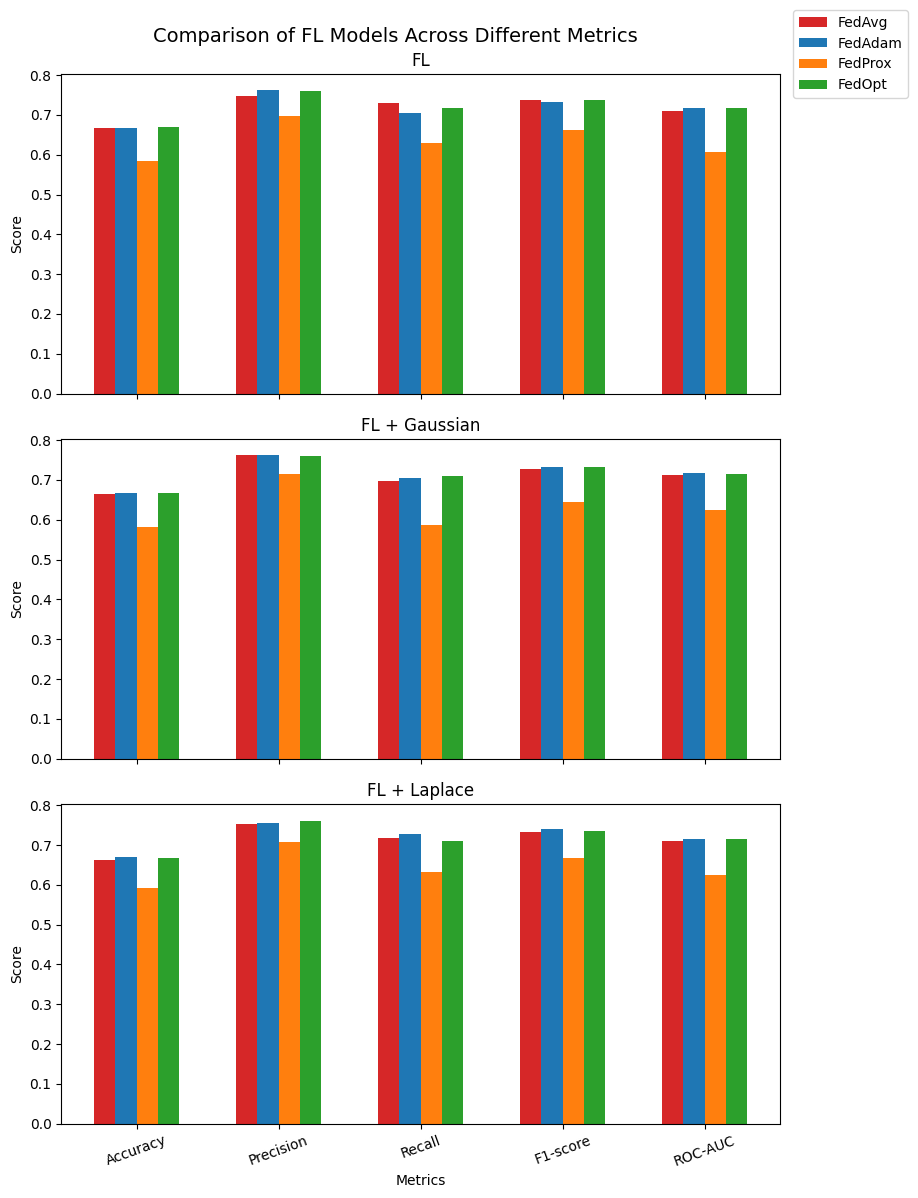

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = "result.xlsx"
xls = pd.ExcelFile(file_path)

dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names if sheet_name.lower() != "dp"}

metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]
models = ["FedAvg", "FedAdam", "FedProx", "FedOpt"]

fl_values = dfs["fl"].set_index("Unnamed: 0").loc[models, metrics].values
fl_gaussian_values = dfs["fl with gaussian"].set_index("Unnamed: 0").loc[models, metrics].values
fl_laplace_values = dfs["fl with laplace"].set_index("Unnamed: 0").loc[models, metrics].values

colors = ["#d62728", "#1f77b4", "#ff7f0e", "#2ca02c"]

fl_variants = {
    "FL": fl_values,
    "FL + Gaussian": fl_gaussian_values,
    "FL + Laplace": fl_laplace_values
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12), sharex=True, sharey=True)

for ax, (variant, values) in zip(axes, fl_variants.items()):
    x = np.arange(len(metrics))  # Metric positions
    width = 0.15  # Bar width

    for i, model in enumerate(models):
        ax.bar(x + i * width, values[i], width, label=model, color=colors[i])

    ax.set_ylabel("Score")
    ax.set_title(variant)
    ax.set_xticks(x + width * (len(models) / 2 - 0.5))
    ax.set_xticklabels(metrics, rotation=20)

axes[-1].set_xlabel("Metrics")
fig.suptitle("Comparison of FL Models Across Different Metrics", fontsize=14)
fig.legend(models, loc="upper right", bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


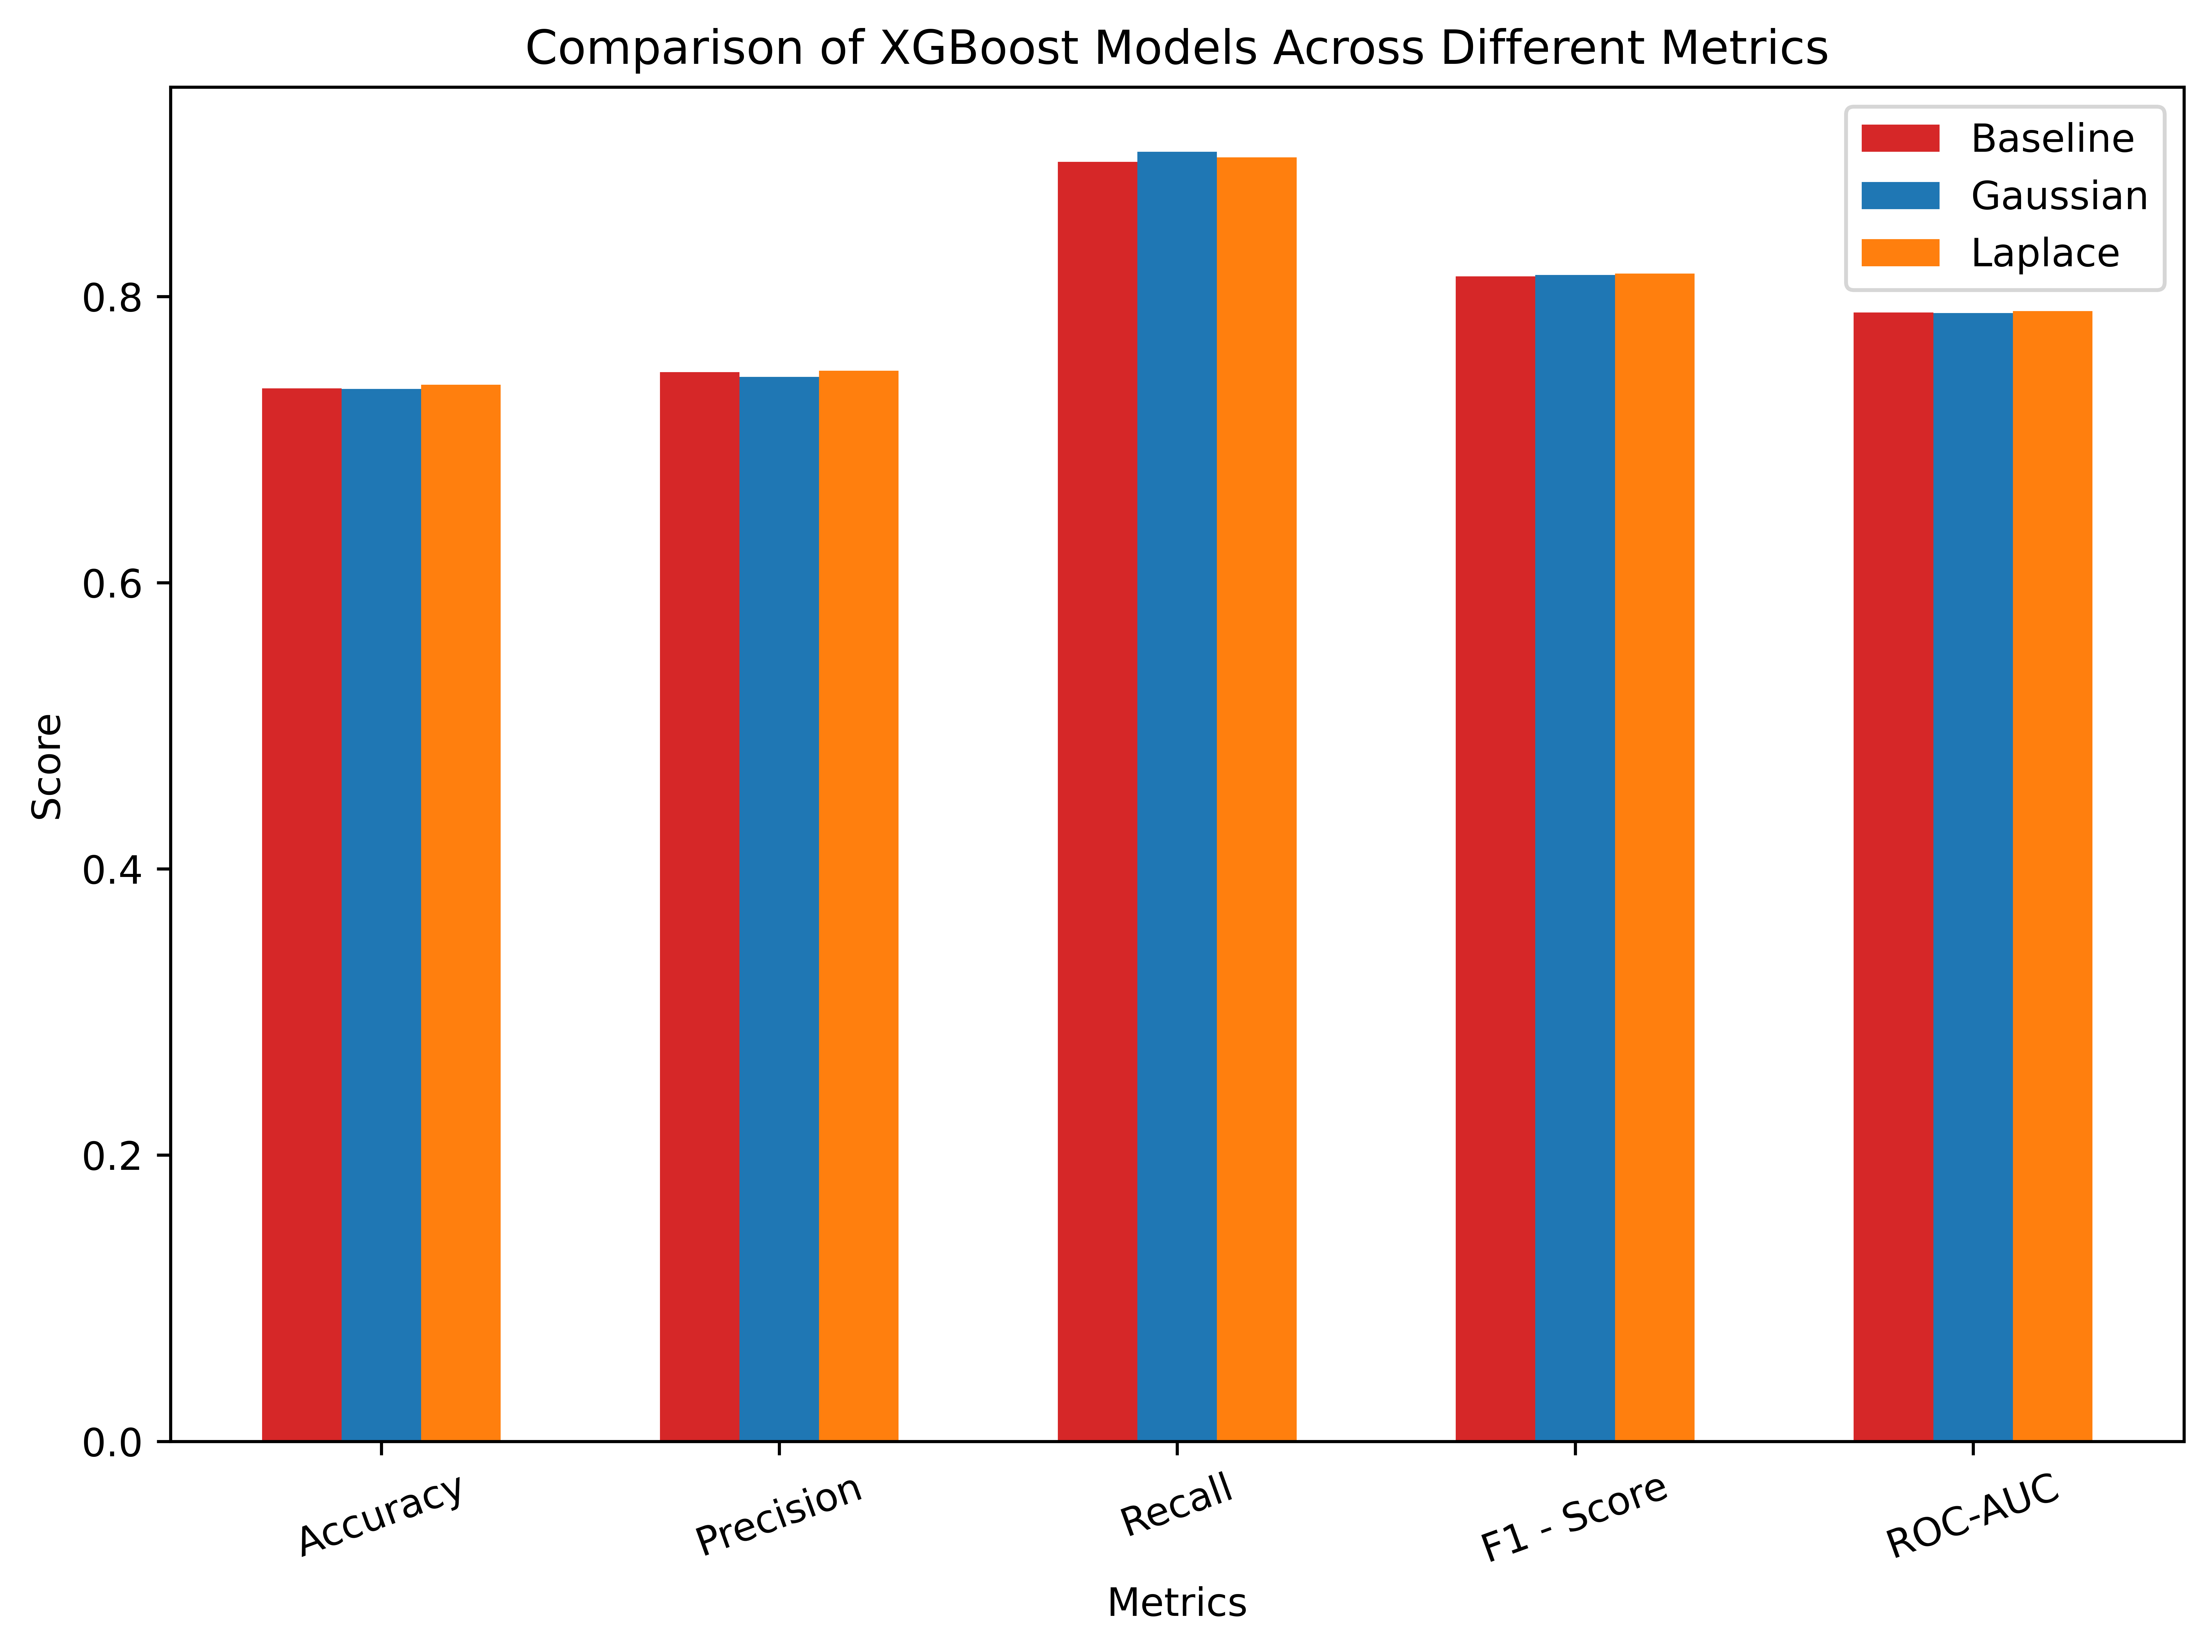

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = "result.xlsx"
xls = pd.ExcelFile(file_path)

# Load all sheets into a dictionary of DataFrames, ignoring 'dp' sheet
dfs = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names if sheet_name.lower() != "dp"}

# Extracting data correctly by setting the first column as index
xgb_df = dfs["xgboost"].set_index("Unnamed: 0")

# Define models and metrics
xgb_models = ["Baseline", "Gaussian", "Laplace"]
metrics = xgb_df.index.tolist()

# Convert to numpy array for plotting
xgb_values = xgb_df.loc[metrics, xgb_models].values.T  # Transpose to align correctly

# Define color scheme for bars (Red, Yellow, Blue)
colors = ["#d62728", "#1f77b4", "#ff7f0e"]

# Plot grouped bar chart
x = np.arange(len(metrics))  # Metric positions
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(8, 6), dpi=1000)

for i, model in enumerate(xgb_models):
    ax.bar(x + i * width, xgb_values[i], width, label=model, color=colors[i])

ax.set_xlabel("Metrics")
ax.set_ylabel("Score")
ax.set_title("Comparison of XGBoost Models Across Different Metrics")
ax.set_xticks(x + width)
ax.set_xticklabels(metrics, rotation=20)
ax.legend()

plt.tight_layout()
plt.show()
